# Explore here

In [3]:
# Your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('../data/raw/student_performance.csv')


In [4]:
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


In [5]:
df['Approved'] = np.where(df['FinalGrade'] > 70, 1, 0)
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Approved
0,1,John,Male,85,15,78,1,High,80,1
1,2,Sarah,Female,90,20,85,2,Medium,87,1
2,3,Alex,Male,78,10,65,0,Low,68,0
3,4,Michael,Male,92,25,90,3,High,92,1
4,5,Emma,Female,88,18,82,2,Medium,85,1
5,6,Olivia,Female,95,30,88,1,High,90,1
6,7,Daniel,Male,70,8,60,0,Low,62,0
7,8,Sophia,Female,85,17,77,1,Medium,78,1
8,9,James,Male,82,12,70,2,Low,72,1
9,10,Isabella,Female,91,22,86,3,High,88,1


Dataset Features:

    - StudentID: A unique identifier for each student.
    - Name: The name of the student.
    - Gender: The gender of the student (Male/Female).
    - AttendanceRate: The percentage of classes attended by the student.
    - StudyHoursPerWeek: The number of hours the student spends studying each week.
    - PreviousGrade: The grade the student achieved in the previous semester (out of 100).
    - ExtracurricularActivities: The number of extracurricular activities the student is involved in.
    - ParentalSupport: A qualitative assessment of the level of support provided by the student's parents (High/Medium/Low).
    - FinalGrade: The final grade of the student (out of 100), which serves as the target variable for prediction.
    - Approved:  If FinalGrade > 70, then it is considered as Approved (1), else as Not Approved (0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
 9   Approved                   10 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 928.0+ bytes


In [7]:
#Busco duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum().sort_values(ascending=False)

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Approved                     0
dtype: int64

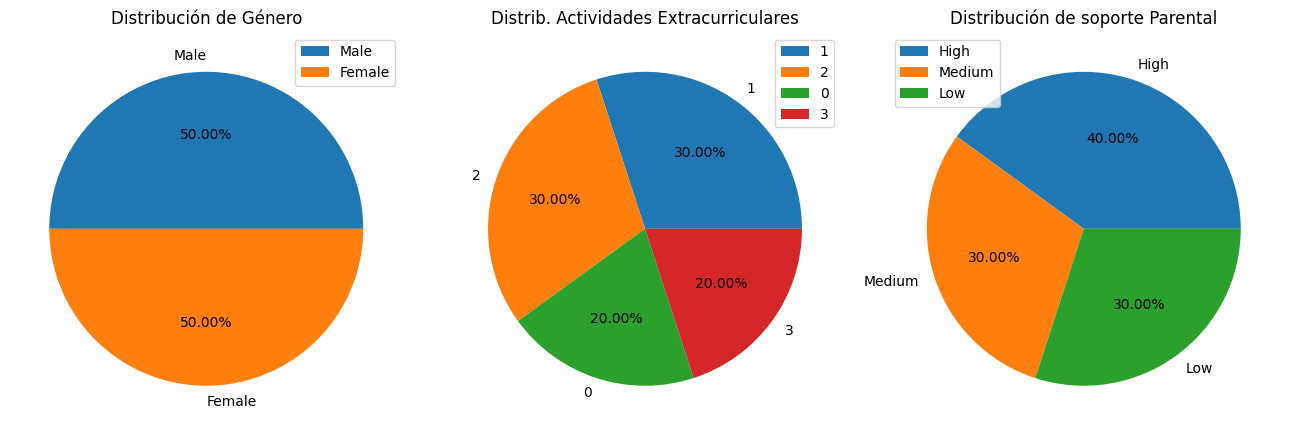

In [9]:
tdf=df['Gender'].value_counts().reset_index()
tdf.columns=['Gender','count']
tdf1=df['ExtracurricularActivities'].value_counts().reset_index()
tdf1.columns=['ExtracurricularActivities','count']
tdf2=df['ParentalSupport'].value_counts().reset_index()
tdf2.columns=['ParentalSupport','count']
fig,axs=plt.subplots(1,3,figsize=(13,13))
axs[0].set_title("Distribución de Género")
axs[0].pie(x=tdf['count'],labels=tdf['Gender'],autopct='%.2f%%')
axs[0].legend(tdf['Gender'])
axs[1].set_title("Distrib. Actividades Extracurriculares")
axs[1].pie(x=tdf1['count'],labels=tdf1['ExtracurricularActivities'],autopct='%.2f%%')
axs[1].legend(tdf1['ExtracurricularActivities'])
axs[2].set_title("Distribución de soporte Parental")
axs[2].pie(x=tdf2['count'],labels=tdf2['ParentalSupport'],autopct='%.2f%%')
axs[2].legend(tdf2['ParentalSupport'])
plt.tight_layout()
plt.show()

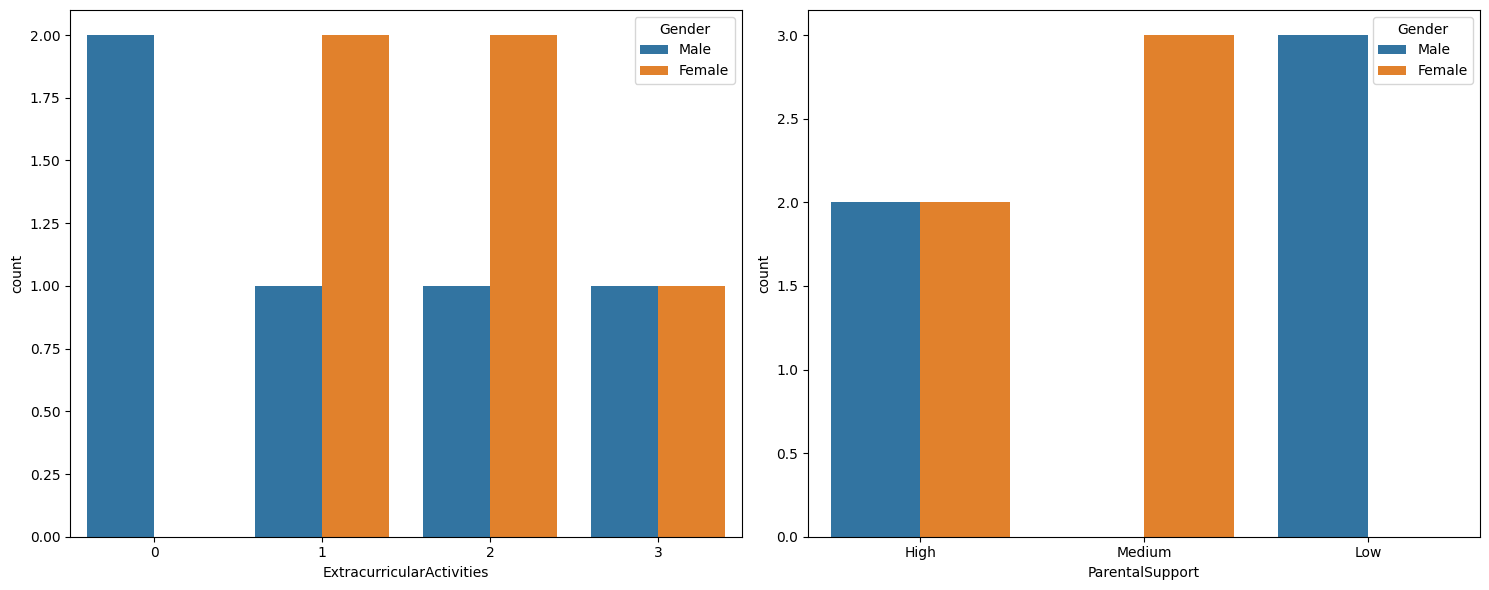

In [10]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['ExtracurricularActivities'],hue=df['Gender'],ax=axs[0])
sns.countplot(x=df['ParentalSupport'],hue=df['Gender'],ax=axs[1])
plt.tight_layout()
plt.show()

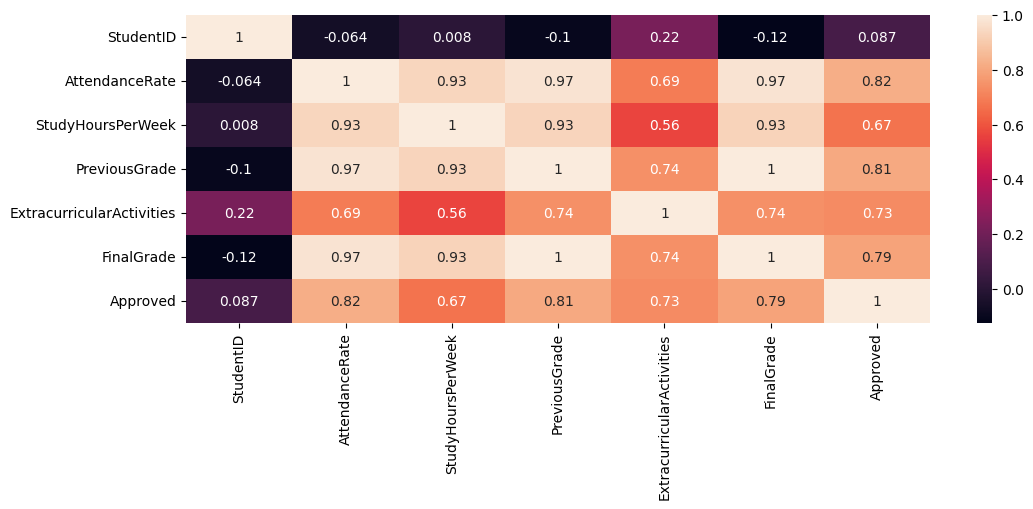

In [11]:
plt.figure(figsize=(12,4))
tdf=df.select_dtypes(include=['int64'])
sns.heatmap(tdf.corr(),annot=True)
plt.show()

<Axes: xlabel='ParentalSupport', ylabel='Count'>

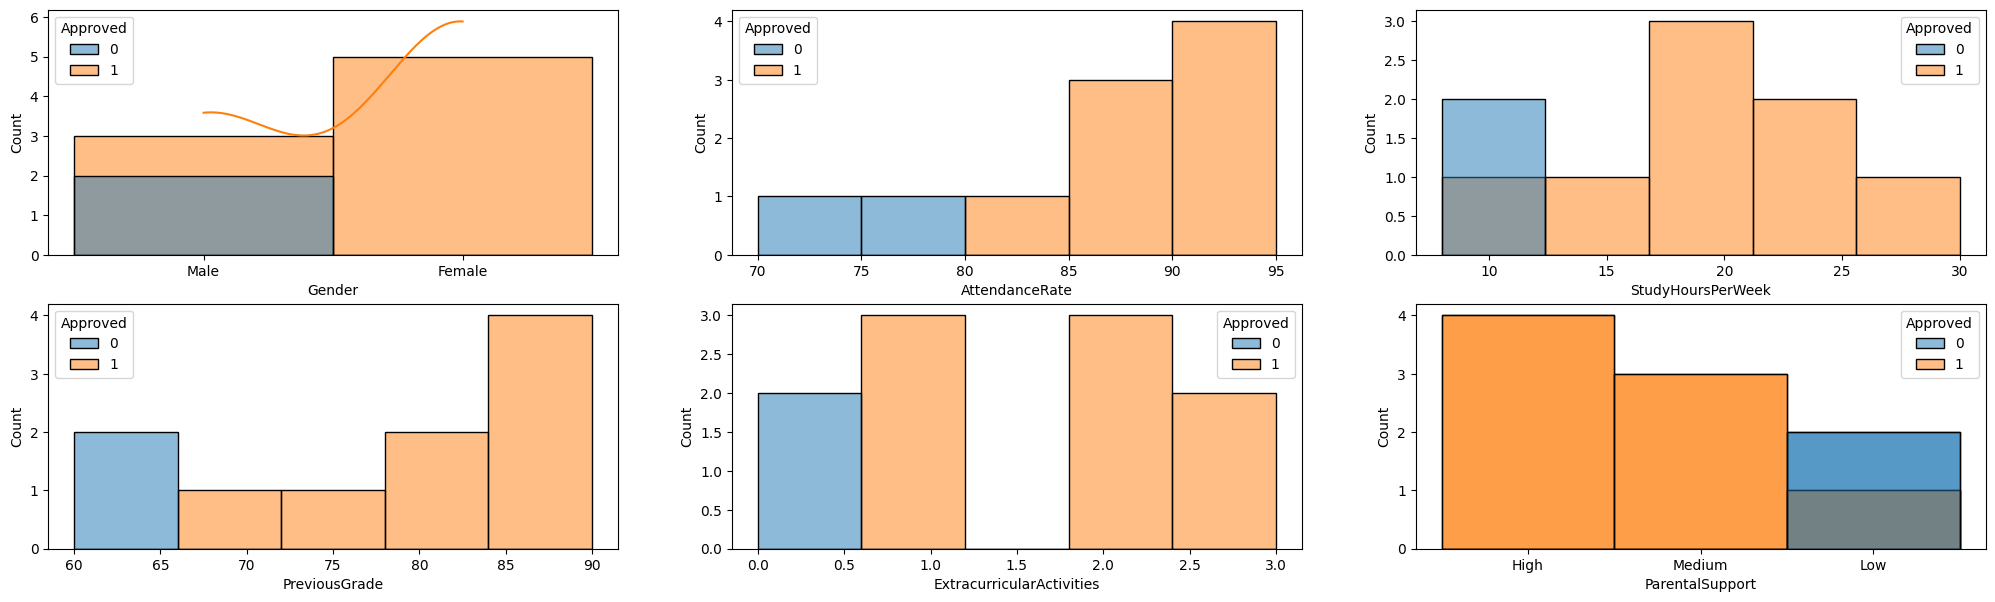

In [12]:
fig, axis = plt.subplots(2, 3, figsize = (25, 7))


sns.histplot(ax = axis[0, 0], data = df, x = "Gender",kde=True,hue="Approved")
sns.histplot(ax = axis[0, 1], data = df, x = "AttendanceRate",hue="Approved")
sns.histplot(ax = axis[0, 2], data = df, x = "StudyHoursPerWeek",hue="Approved")
sns.histplot(ax = axis[1, 0], data = df, x = "PreviousGrade",hue="Approved")
sns.histplot(ax = axis[1, 1], data = df, x = "ExtracurricularActivities",hue="Approved")
sns.histplot(ax = axis[1, 2], data = df, x = "ParentalSupport",hue="Approved")
sns.histplot(ax = axis[1, 2], data = df, x = "ParentalSupport",hue="Approved")
                 
        

In [13]:
df.drop(columns=['StudentID','Name'],inplace=True,axis=1)
print(df['Gender'].value_counts())

Gender
Male      5
Female    5
Name: count, dtype: int64


In [14]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
print(df['ParentalSupport'].value_counts())

ParentalSupport
High      4
Medium    3
Low       3
Name: count, dtype: int64


In [15]:
df['ParentalSupport']=df['ParentalSupport'].apply(lambda x: 2 if x=='High' else 1 if x=='Medium' else 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     10 non-null     int64
 1   AttendanceRate             10 non-null     int64
 2   StudyHoursPerWeek          10 non-null     int64
 3   PreviousGrade              10 non-null     int64
 4   ExtracurricularActivities  10 non-null     int64
 5   ParentalSupport            10 non-null     int64
 6   FinalGrade                 10 non-null     int64
 7   Approved                   10 non-null     int64
dtypes: int64(8)
memory usage: 768.0 bytes
None


In [16]:
df.drop(columns=['FinalGrade'],inplace=True,axis=1)


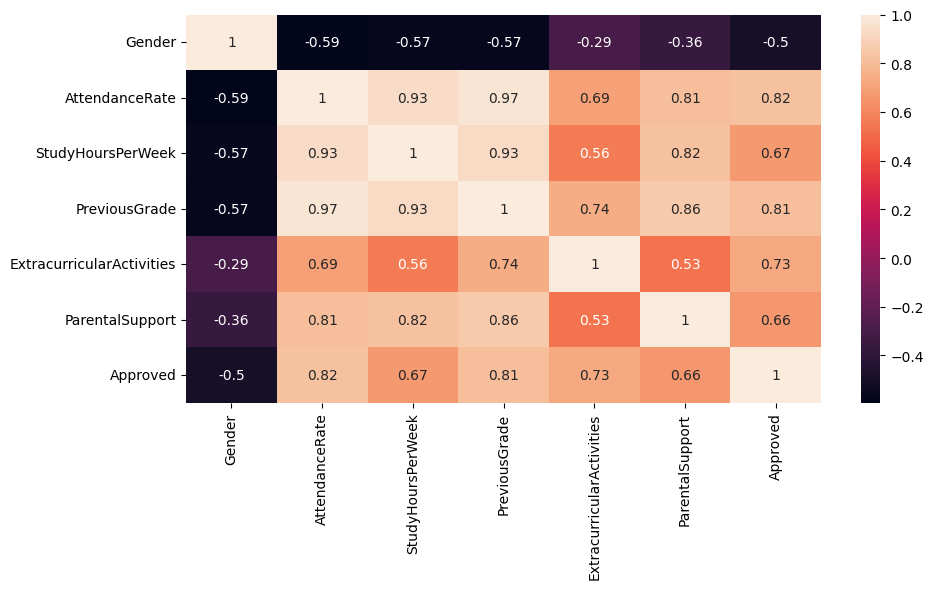

In [17]:
#Analizo la correlacion entre todas las variables
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df.corr(), annot=True)
plt.tight_layout()

plt.show()

In [18]:
df.corr()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,Approved
Gender,1.000000,-0.594922,-0.569500,-0.570048,-0.292770,-0.361158,-0.500000
AttendanceRate,-0.594922,1.000000,0.934885,0.973946,0.691172,0.808285,0.821559
StudyHoursPerWeek,-0.569500,0.934885,1.000000,0.930535,0.563286,0.820865,0.669548
PreviousGrade,-0.570048,0.973946,0.930535,1.000000,0.743432,0.859693,0.808431
ExtracurricularActivities,-0.292770,0.691172,0.563286,0.743432,1.000000,0.528681,0.731925
ParentalSupport,-0.361158,0.808285,0.820865,0.859693,0.528681,1.000000,0.662122
Approved,-0.500000,0.821559,0.669548,0.808431,0.731925,0.662122,1.000000


In [19]:
df.drop(['Gender','ParentalSupport'], axis = 1, inplace = True)

In [20]:
df.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,Approved
0,85,15,78,1,1
1,90,20,85,2,1
2,78,10,65,0,0
3,92,25,90,3,1
4,88,18,82,2,1


In [21]:
#Separo el conjunto de datos en train y test

from sklearn.model_selection import train_test_split

X = df.drop('Approved', axis = 1)
y = df['Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

In [24]:
#Hago un grid search para buscar los mejores hiperparametros

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200,300, 500],
    'max_features': [1,3,5,10,15],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
model_opt = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          n_jobs=-1,
                            cv= 5)
model_opt.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [1, 3, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [25]:
model_opt.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 1, 'n_estimators': 100}

In [26]:
model_opt= RandomForestClassifier(**model_opt.best_params_)

In [27]:
model_opt=RandomForestClassifier(criterion='gini',
                                 max_depth=6,
                                 max_features=3,
                                 n_estimators=500)

model_opt.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=3, n_estimators=500)

In [28]:
y_pred=model_opt.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [29]:
#Pruebo con XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [30]:
#pruebo con naive bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [31]:
import pickle

pickle.dump(model, open('../models/model_xgb.pkl', 'wb'))